In [24]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install IPython --user

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
import os
import soundfile as sf
#import sounddevice as sd
import librosa
import numpy as np
import glob
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
path = 'data/numbers/'
SAMPLE_RATE = 8000

for fileName in glob.iglob(path + '*wav'):
    print('File:', fileName)
    data, sample_rate = sf.read(fileName )
    print("number of samples:", len(data))

File: data/numbers/00_064009241a.wav
number of samples: 12404
File: data/numbers/00_0666098465.wav
number of samples: 16326
File: data/numbers/00_07c3627a21.wav
number of samples: 15702
File: data/numbers/00_139360572a.wav
number of samples: 16326
File: data/numbers/00_2992ca6950.wav
number of samples: 16422
File: data/numbers/00_2b668967a8.wav
number of samples: 12309
File: data/numbers/00_3cb3738708.wav
number of samples: 16326
File: data/numbers/00_5738176457.wav
number of samples: 16326
File: data/numbers/00_6057878849.wav
number of samples: 15702
File: data/numbers/00_66a1550b08.wav
number of samples: 12404
File: data/numbers/00_6776c0b596.wav
number of samples: 8322
File: data/numbers/00_7899937504.wav
number of samples: 16384
File: data/numbers/00_843b1a54a5.wav
number of samples: 16423
File: data/numbers/00_b862b57c44.wav
number of samples: 16347
File: data/numbers/00_cb3a68216a.wav
number of samples: 16326
File: data/numbers/01_0682422500.wav
number of samples: 12309
File: dat

number of samples: 15702
File: data/numbers/10_c33b598001.wav
number of samples: 8322
File: data/numbers/11_0a78649368.wav
number of samples: 16384
File: data/numbers/11_1a80281987.wav
number of samples: 16326
File: data/numbers/11_2324909063.wav
number of samples: 16422
File: data/numbers/11_372b227c2b.wav
number of samples: 8322
File: data/numbers/11_590c23a2c0.wav
number of samples: 15604
File: data/numbers/11_5a13b80067.wav
number of samples: 15702
File: data/numbers/11_5c12c4c5c2.wav
number of samples: 15604
File: data/numbers/11_77cc6607ac.wav
number of samples: 16326
File: data/numbers/11_c431796a8b.wav
number of samples: 8322
File: data/numbers/12_349c10a4ac.wav
number of samples: 16347
File: data/numbers/12_419bc4887b.wav
number of samples: 16326
File: data/numbers/12_4a08511730.wav
number of samples: 8322
File: data/numbers/12_54a1097386.wav
number of samples: 8322
File: data/numbers/12_5742a003c3.wav
number of samples: 16422
File: data/numbers/12_a21cc38502.wav
number of sam

0.0


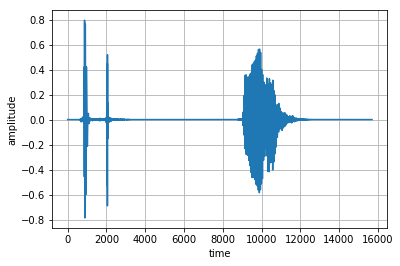

In [39]:
#data, sample_rate = sf.read('data/numbers/02_b4a02c3c00.wav' )
data, sample_rate = sf.read('data/numbers/00_6057878849.wav' )
print(min(abs(data)))
plt.figure()
plt.plot(data)
plt.xlabel('time')
plt.ylabel('amplitude')
#plt.yscale('log')
plt.grid(True)

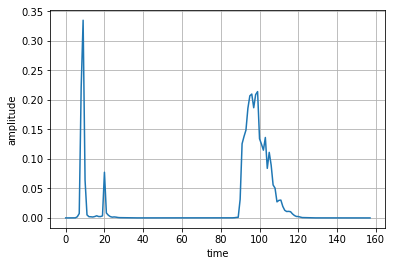

In [40]:
averages = []
frameSize = 100
for frame in range(0,len(data), frameSize):
    averages.append(np.average(np.absolute(data[frame:frame+frameSize])))
#print(averages)
#print(np.average(averages))
avg = np.average(averages)
plt.figure()
plt.plot(averages)
plt.xlabel('time')
plt.ylabel('amplitude')
#plt.yscale('log')
plt.grid(True)

[(8, 11), (20, 21), (90, 114), (115, 116)]
(115, 116)
start idx: 9000 end idx: 11400


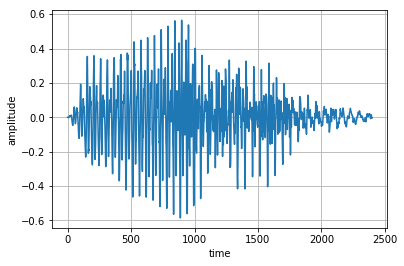

In [41]:
startIdx = None
endIdx = None
clusters = []
for idx, frame in enumerate(range(0,len(data), step)):
    if averages[idx] > avg/2 and not startIdx:
        startIdx = idx
    if startIdx and not endIdx:
        if averages[idx] < avg/2:
            endIdx = idx
    if startIdx and endIdx:
        clusters.append((startIdx,endIdx))
        startIdx = None
        endIdx = None
        
print(clusters) 
# find largest cluster
largest_cluster = 0
largest_cluster_size = 0
for cluster in clusters:
    cluster_size = cluster[1]-cluster[0]
    if cluster_size > largest_cluster_size:
        largest_cluster_size = cluster_size
        largest_cluster = cluster
        
clippedData = data[largest_cluster[0]*frameSize:largest_cluster[1]*frameSize]
        
    
print(cluster)
print('start idx:', largest_cluster[0]*frameSize, 'end idx:',largest_cluster[1]*frameSize)
#newData = data[startIdx*100:endIdx*100]
plt.figure()
plt.plot(clippedData)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True)
#plays audio
#ipd.Audio(clippedData, rate=SAMPLE_RATE)
sf.write('output.wav', clippedData, SAMPLE_RATE, subtype='PCM_16')

(8164,)
[0.29718018 0.77803293 0.15939209 ... 0.00657533 0.0049441  0.00476074]


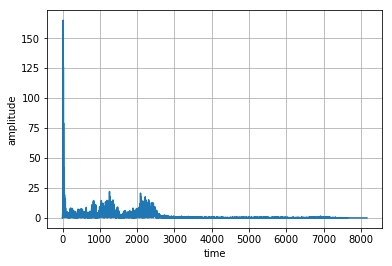

In [45]:
mags = abs(np.real(np.fft.rfft(data)))
print(mags.shape)
print(mags)
plt.figure()
plt.plot(mags)
plt.xlabel('time')
plt.ylabel('amplitude')
#plt.yscale('log')
plt.grid(True)